# Imports:

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score, precision_score
import warnings
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import rcParams
from termcolor import colored as cl 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import math

# Import and Read the 'Chicago Food Inspections' CSV File:

In [4]:
data = pd.read_csv('Food-Inspections.csv')

In [5]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2352683,CHIPOTLE MEXICAN GRILL,CHIPOTLE MEXICAN GRILL,2670642.0,Restaurant,Risk 1 (High),1025 W ADDISON ST,CHICAGO,IL,60613.0,2019-12-04T00:00:00.000,License Re-Inspection,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.947118,-87.655381,"{'latitude': '-87.6553811622124', 'longitude':..."
1,2352734,CHILI'S T-I,CHILI'S (T1-B14),34169.0,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666.0,2019-12-04T00:00:00.000,Canvass,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,42.008536,-87.914428,"{'latitude': '-87.91442843927047', 'longitude'..."
2,2352713,NICK'S FIRE GRILL STEAK & LEMONADE INC.,NICK'S FIRE GRILL STEAK & LEMONADE INC.,2699090.0,NaN,Risk 1 (High),2900 W 63RD ST,CHICAGO,IL,60629.0,2019-12-04T00:00:00.000,License,Not Ready,NaN,41.779190,-87.695892,"{'latitude': '-87.69589237398256', 'longitude'..."
3,2352701,TAQUERIA BLUE LINE INC.,NaN,2703436.0,Restaurant,Risk 1 (High),3401 W BELMONT AVE,CHICAGO,IL,60618.0,2019-12-04T00:00:00.000,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.939168,-87.712546,"{'latitude': '-87.71254599117191', 'longitude'..."
4,2352727,PORTAGE PARK DAY NURSERY,MOSAIC EARLY CHILDHOOD ACADEMY,2215815.0,Children's Services Facility,Risk 1 (High),5332-5334 W ADDISON ST,CHICAGO,IL,60641.0,2019-12-04T00:00:00.000,Canvass,Pass,NaN,41.946065,-87.760722,"{'latitude': '-87.76072227616888', 'longitude'..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196825 entries, 0 to 196824
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    196825 non-null  int64  
 1   DBA Name         196825 non-null  object 
 2   AKA Name         194367 non-null  object 
 3   License #        196808 non-null  float64
 4   Facility Type    192057 non-null  object 
 5   Risk             196756 non-null  object 
 6   Address          196825 non-null  object 
 7   City             196686 non-null  object 
 8   State            196783 non-null  object 
 9   Zip              196775 non-null  float64
 10  Inspection Date  196825 non-null  object 
 11  Inspection Type  196824 non-null  object 
 12  Results          196825 non-null  object 
 13  Violations       144559 non-null  object 
 14  Latitude         196135 non-null  float64
 15  Longitude        196135 non-null  float64
 16  Location         196135 non-null  obje

# EDA: 
## Let's Take a Closer Look at our Data

In [7]:
data['year']=data['Inspection Date'].apply(lambda x:x.split('-')[0])
data['month']=data['Inspection Date'].apply(lambda x:x.split('-')[1])
data['day']=data['Inspection Date'].apply(lambda x:x.split('-')[2].split('T')[0])

# Visualizations: 
## A. Counting the Number of Inspections

Text(0.5, 0, 'Year')

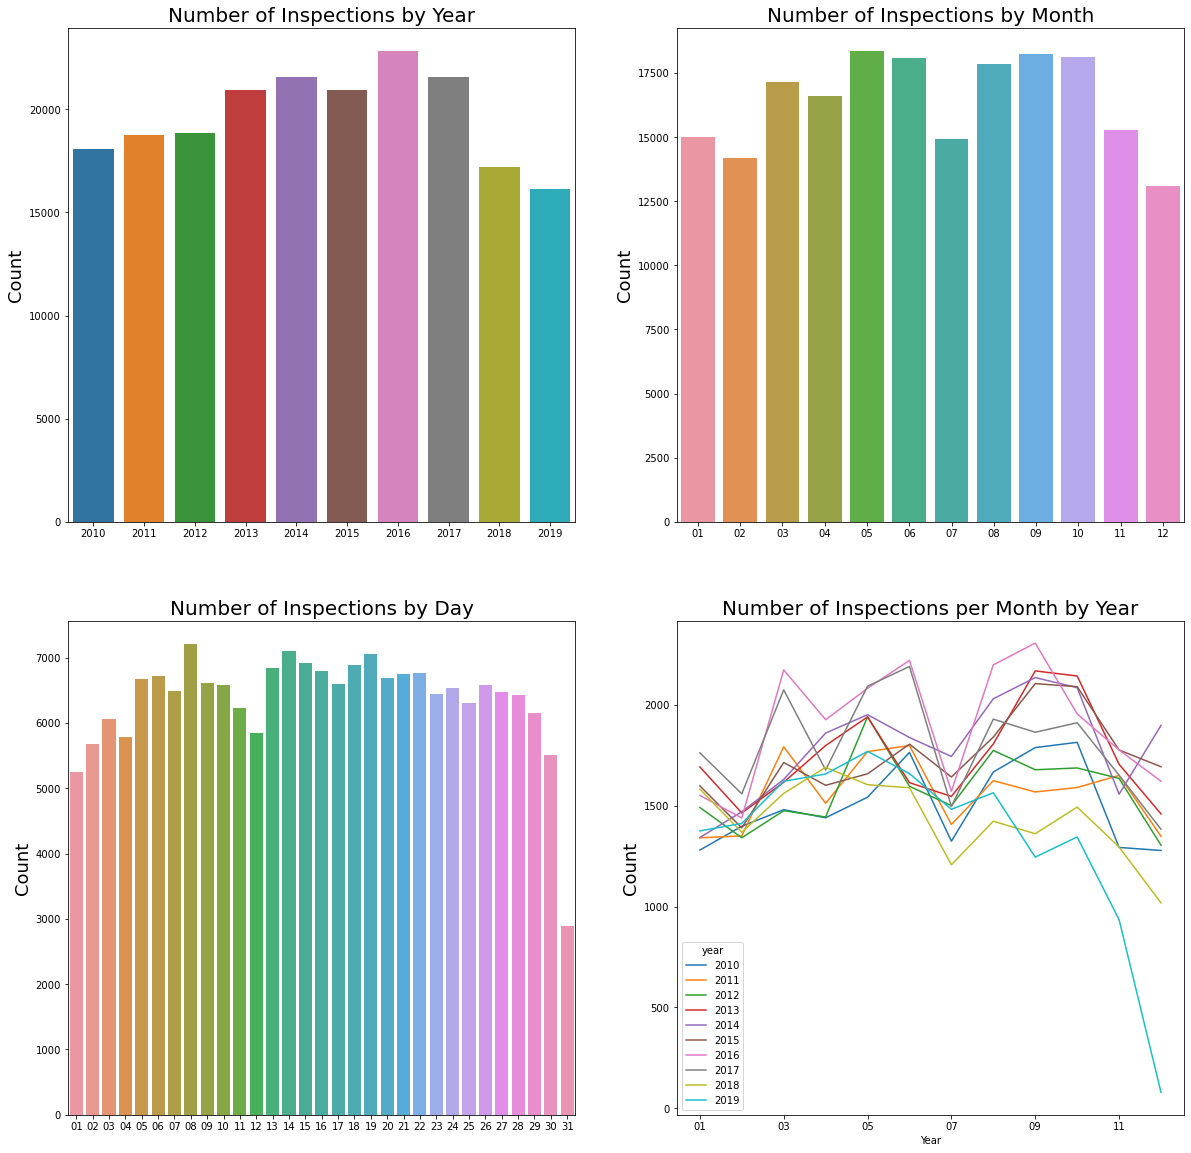

In [9]:
# See the number of inspections across day, month and year

fig,ax=plt.subplots(2,2,figsize=(20,20))
x=data.year.value_counts().index
y=data.year.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0])
ax[0,0].set_title("Number of Inspections by Year",size=20)
ax[0,0].set_ylabel('Count',size=18)
ax[0,0].set_xlabel('')

x=data.month.value_counts().index
y=data.month.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,1])
ax[0,1].set_title("Number of Inspections by Month",size=20)
ax[0,1].set_ylabel('Count',size=18)
ax[0,1].set_xlabel('')

x=data.day.value_counts().index
y=data.day.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,0])
ax[1,0].set_title("Number of Inspections by Day",size=20)
ax[1,0].set_ylabel('Count',size=18)
ax[1,0].set_xlabel('')

data.groupby(['year','month'])['Inspection ID'].agg('count').unstack('year').plot(ax=ax[1,1])
ax[1,1].set_title("Number of Inspections per Month by Year",size=20)
ax[1,1].set_ylabel('Count',size=18)
ax[1,1].set_xlabel('Year')

## B. Risk Distributions

Text(0, 0.5, 'Latitude')

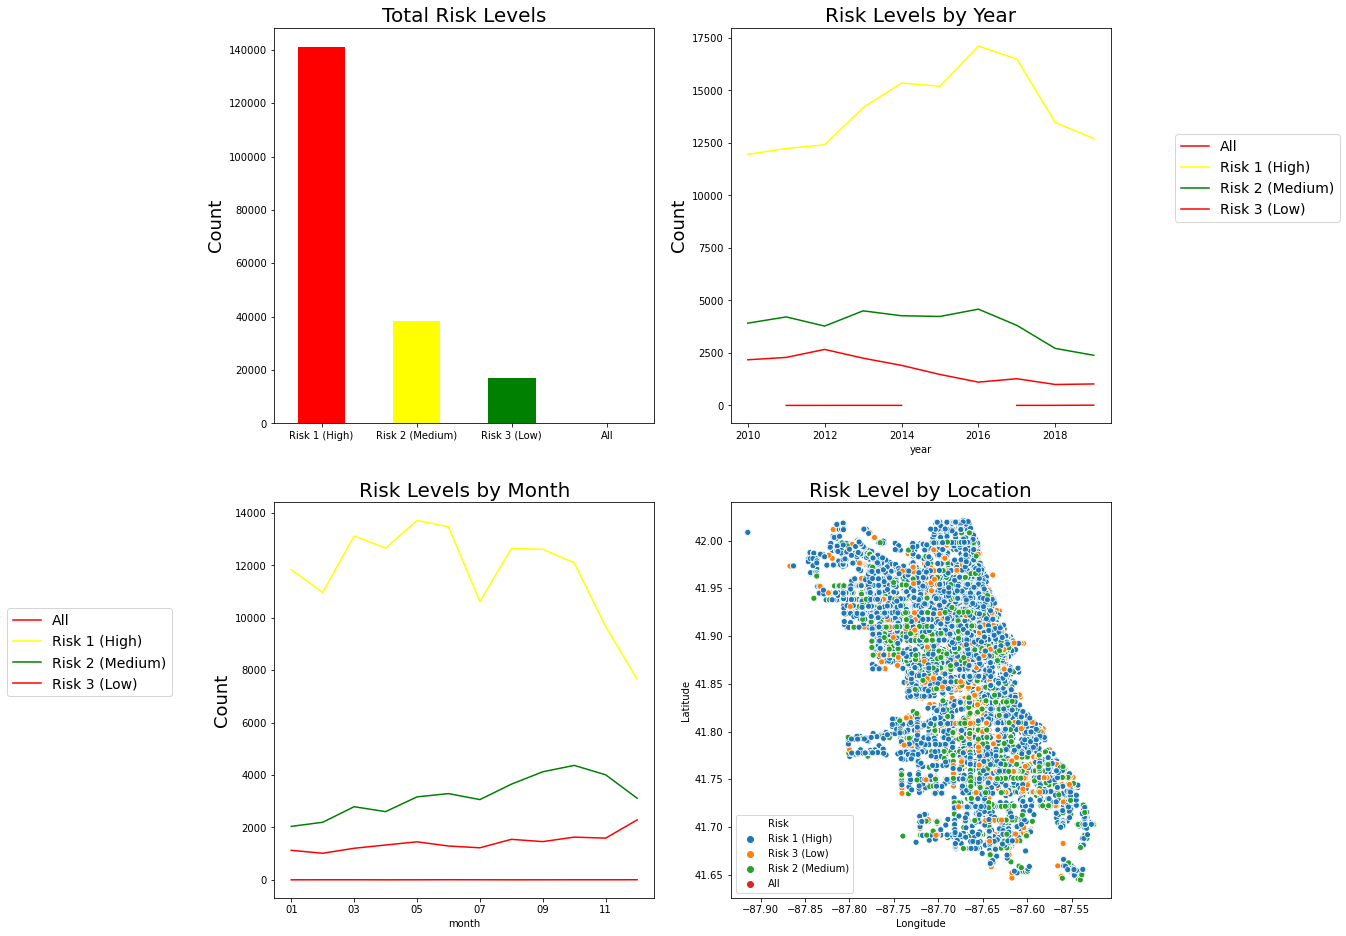

In [12]:
# See risk distributions by month, year and location

fig,ax=plt.subplots(2,2,figsize=(15,16))
data.Risk.value_counts().plot(kind='bar',color=['red','yellow','green'],ax=ax[0,0])
ax[0,0].tick_params(axis='x',labelrotation=360)
ax[0,0].set_title("Total Risk Levels",size=20)
ax[0,0].set_ylabel('Count',size=18)


data.groupby(['year','Risk'])['Inspection ID'].agg('count').unstack('Risk').plot(ax=ax[0,1],color=['red','yellow','green'])
ax[0,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,0.75))
ax[0,1].set_title("Risk Levels by Year",size=20)
ax[0,1].set_ylabel('Count',size=18)

data.groupby(['month','Risk'])['Inspection ID'].agg('count').unstack('Risk').plot(ax=ax[1,0],color=['red','yellow','green'])
ax[1,0].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(-0.25,0.75))
ax[1,0].set_title("Risk Levels by Month",size=20)
ax[1,0].set_ylabel('Count',size=18)

sns.scatterplot(x='Longitude',y='Latitude',hue='Risk' ,data=data, ax=ax[1,1])
ax[1,1].set_title("Risk Level by Location",size=20)
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_ylabel('Latitude')

## C. Risk Distribution By Facility Type

## Risk 1 (High)

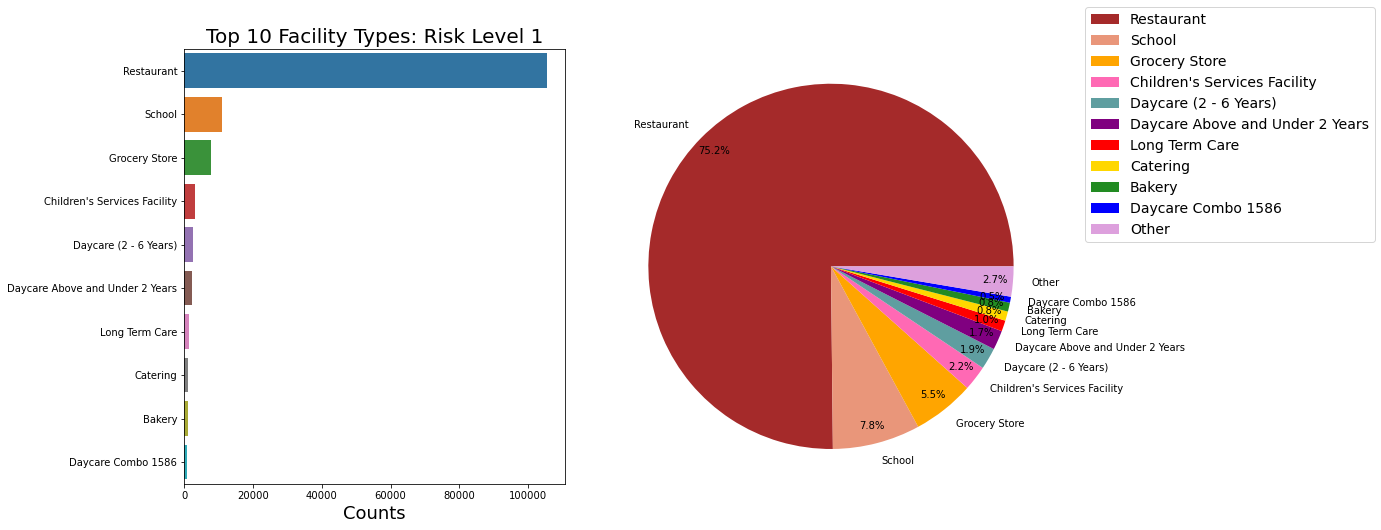

In [13]:
# See which facility types are most at risk across all 4 levels of risk 

data_risk1=data[data.Risk=='Risk 1 (High)']
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=data_risk1['Facility Type'].value_counts()[:10],y=data_risk1['Facility Type'].value_counts()[:10].index,ax=ax[0])
ax[0].set_title("Top 10 Facility Types: Risk Level 1",size=20)
ax[0].set_xlabel('Counts',size=18)
count=data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False)
groups=list(data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False).index[:10])
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
ax[1].set_ylabel('')
ax[1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,1.2))


## Risk 2 (Medium)

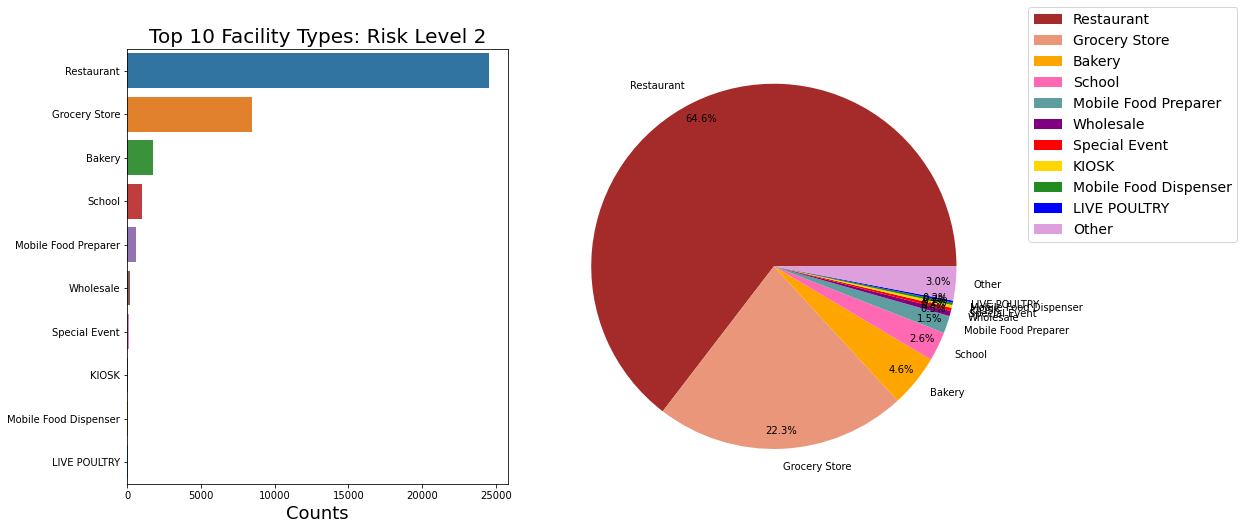

In [14]:
data_risk1=data[data.Risk=='Risk 2 (Medium)']
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=data_risk1['Facility Type'].value_counts()[:10],y=data_risk1['Facility Type'].value_counts()[:10].index,ax=ax[0])
ax[0].set_title("Top 10 Facility Types: Risk Level 2",size=20)
ax[0].set_xlabel('Counts',size=18)
count=data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False)
groups=list(data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False).index[:10])
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
ax[1].set_ylabel('')
ax[1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,1.2))

## Risk 3 (Low)

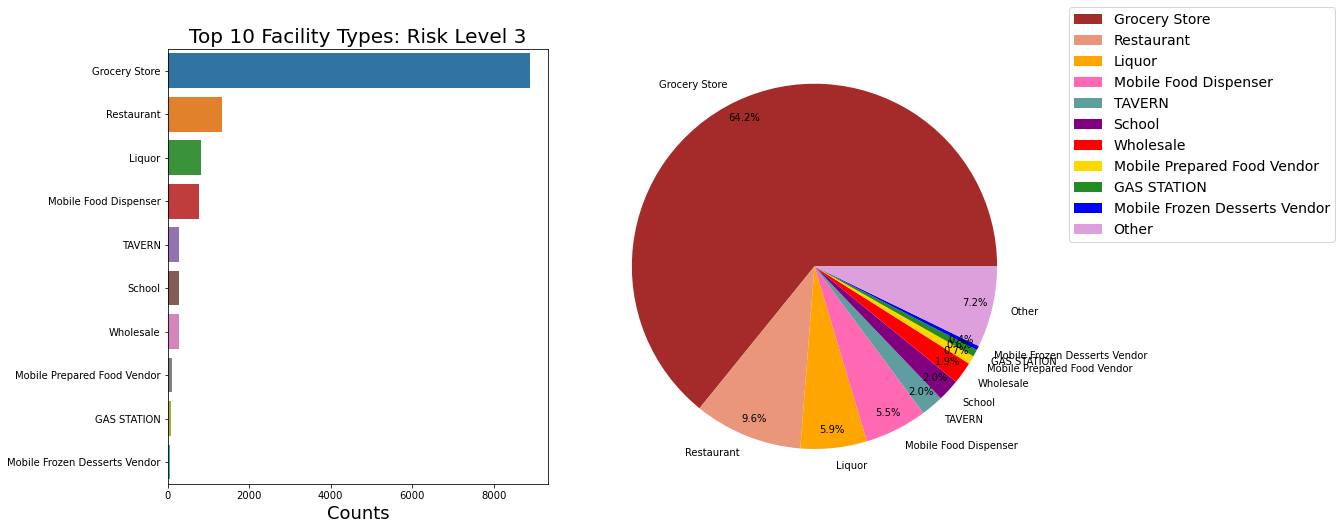

In [15]:
data_risk1=data[data.Risk=='Risk 3 (Low)']
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=data_risk1['Facility Type'].value_counts()[:10],y=data_risk1['Facility Type'].value_counts()[:10].index,ax=ax[0])
ax[0].set_title("Top 10 Facility Types: Risk Level 3",size=20)
ax[0].set_xlabel('Counts',size=18)
count=data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False)
groups=list(data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False).index[:10])
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
ax[1].set_ylabel('')
ax[1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,1.2))

## Risk 4 (All)

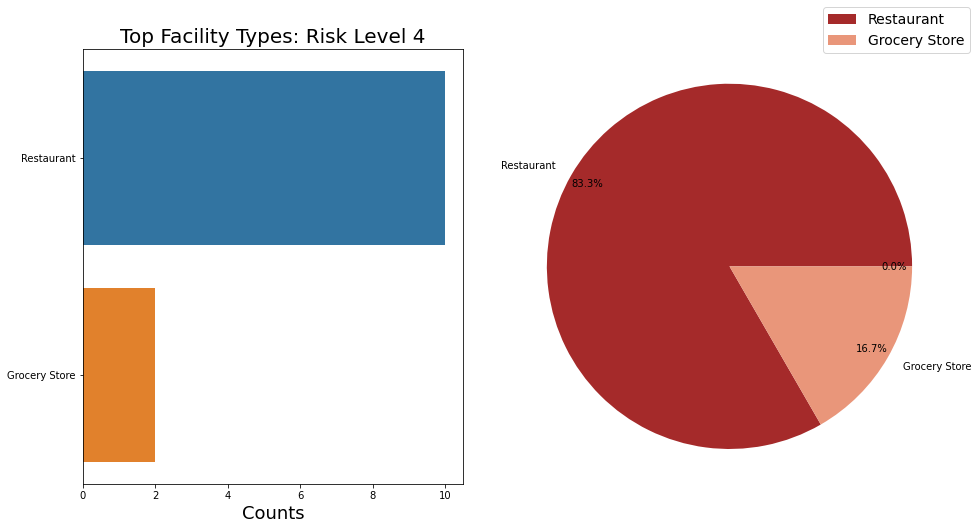

In [16]:
data_risk1=data[data.Risk=='All']
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=data_risk1['Facility Type'].value_counts()[:10],y=data_risk1['Facility Type'].value_counts()[:10].index,ax=ax[0])
ax[0].set_title("Top Facility Types: Risk Level 4",size=20)
ax[0].set_xlabel('Counts',size=18)
count=data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False)
groups=list(data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False).index[:10])
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
ax[1].set_ylabel('')
ax[1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,1.2))

## D. Distribution of Target: Results

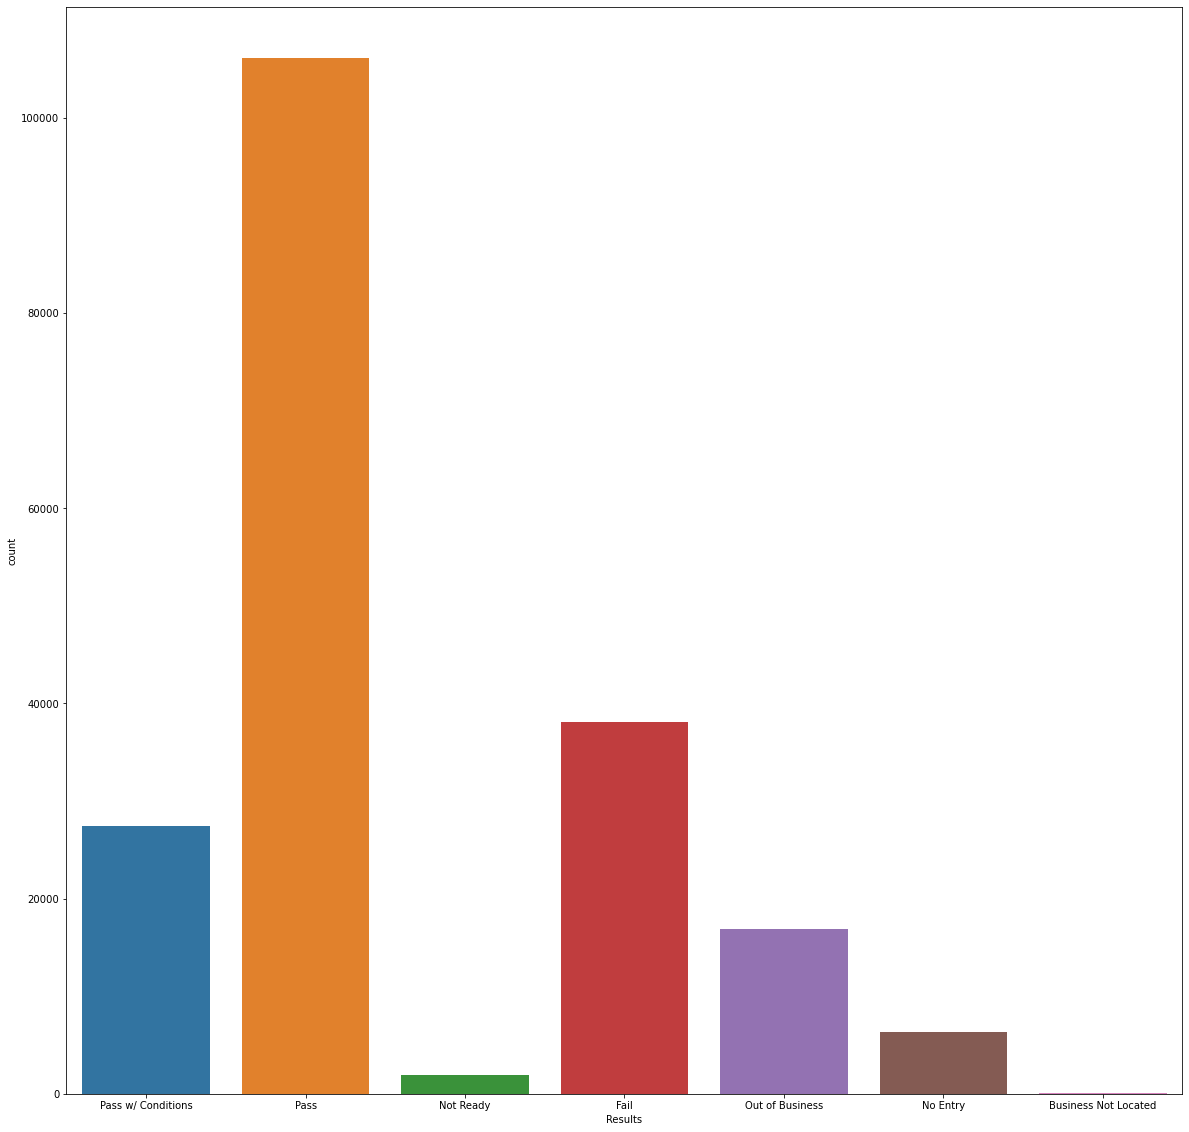

In [17]:
# Our target variable is Results, here we can easily see the distribution
# Find out it is multi-class...and we want binary!

fig_dims = (20,20)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=data,x="Results",ax=ax)
plt.show()

In [ ]:
# Pie chart representation- just another visual

data["Results"].value_counts().head(7).plot(kind='pie',autopct='%1.1f%%',figsize=(20,20)).legend()

In [18]:
# Breakdown of our final Results

data["Results"].value_counts()

Pass                    106066
Fail                     38087
Pass w/ Conditions       27448
Out of Business          16919
No Entry                  6324
Not Ready                 1912
Business Not Located        69
Name: Results, dtype: int64